In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 0: stay, 1: switch
# rewards = e^{-t} for number of steps stayed


def simulate_fixed_policy(p=0.8, steps=10000):
    rew_hist = np.zeros(steps)
    action_hist = np.zeros(steps)
    t = 0
    p = 0.8 # prob stay

    for i in range(steps):
        
            
        
        # if action == 0:
        if np.random.random() < p:
            r = np.exp(-(t))
            # r = 2
            a = 0
            t += 1
        else:
            r = -1
            a = 1
            t = 0
        rew_hist[i] = r
        action_hist[i] = a
    return rew_hist, action_hist

def compute_returns(rew_hist, gamma=0.99,  steps=10000):
    # Compute returns G_\pi
    returns = np.zeros(len(rew_hist))
    returns[-1] = rew_hist[-1]
    for i in range(2, steps+1):
        # print(i, rew_hist[-i], returns[-(i-1)])
        returns[-i] = rew_hist[-i] + gamma * returns[-(i-1)]
    return returns

def compute_q_values(returns, action_hist):
    # Expected Q values for each action
    Q = np.zeros(2)

    # Remove last 2000 steps to get more steady state returns
    trunc_returns = returns[:-2000]
    trunc_action_hist = action_hist[:-2000]

    Q[0] = np.mean(trunc_returns[trunc_action_hist == 0])
    Q[1] = np.mean(trunc_returns[trunc_action_hist == 1])
    
    new_p = Q[0] / np.sum(Q) # new_p following Q values
    return Q, new_p

In [18]:
def simulate_fixed_policy_v2(p=0.8, steps=10000):
    rew_hist = np.zeros(steps)
    action_hist = np.zeros(steps)
    t = 0
    p = 0.8 # prob stay
    time_spent = 0
    travel_time = 5

    for i in range(steps):
        
        # if action == 0:
        if np.random.random() < p:
            
            if travel_time == 5:
                reward = np.exp(-.6*time_spent)
            else:
                reward = 0
            time_spent += 1
            a = 0

        # if action == 1:
        else:
            time_spent = 0
            if travel_time >1:
                travel_time -= 1
                reward = 0
            else:
                travel_time = 5
                reward = 1

            a = 1

        rew_hist[i] = reward
        action_hist[i] = a
    return rew_hist, action_hist

In [19]:
rew_hist, action_hist = simulate_fixed_policy_v2(p=.8)
returns = compute_returns(rew_hist, gamma=0.99)
Q, new_p = compute_q_values(returns, action_hist)
new_p

np.float64(0.488162527196578)

In [33]:
# run through a few different options for p and gamma 

# want p to be in a range of .5 to .99
# and gamma to be in a range of .5 to .99

info = []

for p in range(70, 100, 1):
    p = p / 100
    for gamma in range(70, 100, 1):
        gamma = gamma / 100
        rew_hist, action_hist = simulate_fixed_policy_v2(p=p)
        returns = compute_returns(rew_hist, gamma=gamma)
        Q, new_p = compute_q_values(returns, action_hist)
        print(f"p: {p}, gamma: {gamma}, Q: {Q}, new_p: {new_p}, returns: {returns[-1]}")
        info.append((p, gamma, Q[0], Q[1], new_p, returns[-1]))

p: 0.7, gamma: 0.7, Q: [0.27520313 0.54331122], new_p: 0.33622273340750614, returns: 0.0
p: 0.7, gamma: 0.71, Q: [0.28403899 0.54050293], new_p: 0.3444809613173342, returns: 0.0
p: 0.7, gamma: 0.72, Q: [0.30030353 0.57388928], new_p: 0.3435209362308874, returns: 0.0
p: 0.7, gamma: 0.73, Q: [0.30126716 0.55754512], new_p: 0.35079512479561875, returns: 0.0
p: 0.7, gamma: 0.74, Q: [0.32592313 0.58253143], new_p: 0.35876656866647694, returns: 0.0
p: 0.7, gamma: 0.75, Q: [0.35220198 0.6244875 ], new_p: 0.36060793620456233, returns: 0.5488116360940265
p: 0.7, gamma: 0.76, Q: [0.34361984 0.60751125], new_p: 0.3612749567444436, returns: 0.0
p: 0.7, gamma: 0.77, Q: [0.3667575  0.61806314], new_p: 0.3724104556332862, returns: 0.0
p: 0.7, gamma: 0.78, Q: [0.38610589 0.6860631 ], new_p: 0.36011663850196285, returns: 0.0
p: 0.7, gamma: 0.79, Q: [0.41698116 0.70797097], new_p: 0.3706656939481433, returns: 0.0
p: 0.7, gamma: 0.8, Q: [0.40871195 0.70801575], new_p: 0.36599069619279395, returns: 0.0149

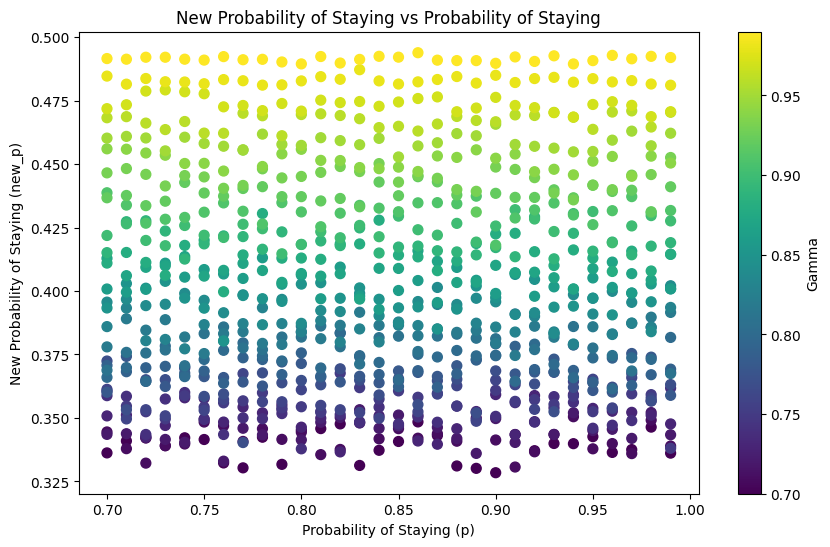

In [37]:
# use info to plot a  scatter plot of p vs new_p
info = np.array(info)
plt.figure(figsize=(10, 6))
plt.scatter(info[:, 0], info[:, 4], c=info[:, 1], cmap='viridis', s=50)
plt.colorbar(label='Gamma')
plt.xlabel('Probability of Staying (p)')
plt.ylabel('New Probability of Staying (new_p)')
plt.title('New Probability of Staying vs Probability of Staying')
plt.show()




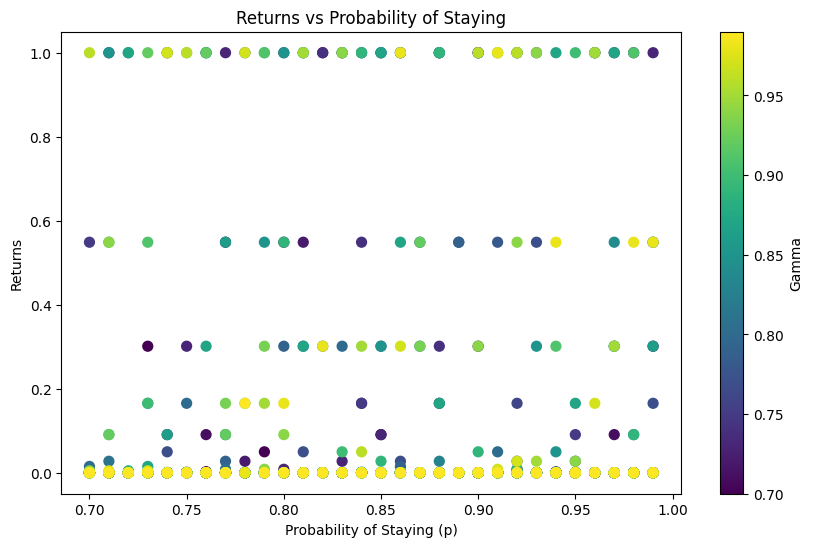

In [35]:
# plot the returns from info 
plt.figure(figsize=(10, 6))
plt.scatter(info[:, 0], info[:, 5], c=info[:, 1], cmap='viridis', s=50)
plt.colorbar(label='Gamma')
plt.xlabel('Probability of Staying (p)')
plt.ylabel('Returns')
plt.title('Returns vs Probability of Staying')
plt.show()


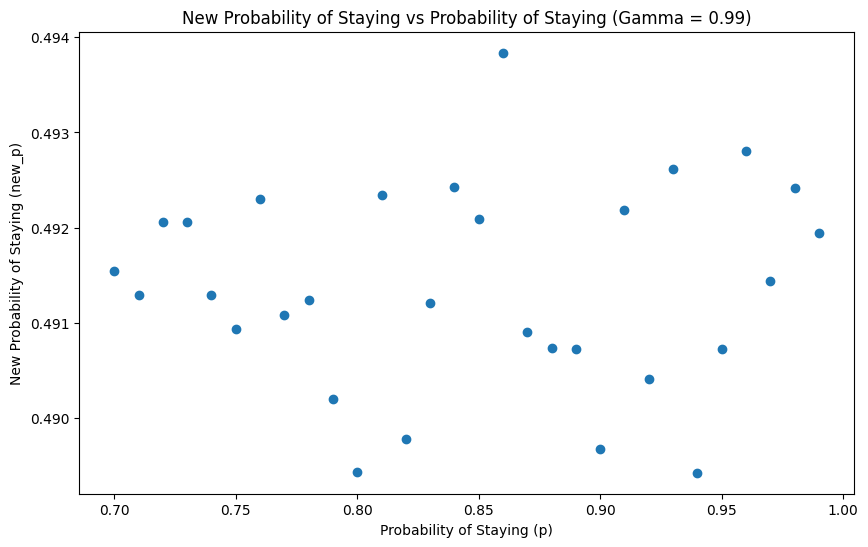

In [36]:
# plot all the gamma = .99 values 

info = np.array(info)
plt.figure(figsize=(10, 6))
plt.scatter(info[info[:, 1] == 0.99, 0], info[info[:, 1] == 0.99, 4])
plt.xlabel('Probability of Staying (p)')
plt.ylabel('New Probability of Staying (new_p)')
plt.title('New Probability of Staying vs Probability of Staying (Gamma = 0.99)')
# label each point with the Q values

plt.show()
